<a href="https://colab.research.google.com/github/Balgem/predicciones-de-ventas-alimenticias/blob/main/predicciones_de_ventas_alimenticias.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

In [2]:
url = 'https://raw.githubusercontent.com/Balgem/predicciones-de-ventas-alimenticias/9b93a1d1d5800166ed4c96c12611b3c944f5c23d/sales_predictions.csv'
df = pd.read_csv(url)

In [4]:
#Comprobando que bd cargada corresponde, identificando cantidad de filas y columnas
df

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,NaN,Tier 2,Supermarket Type1,549.2850
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976


In [ ]:
#Identificando tipos de datos
df.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object

In [ ]:
#Identificando valores duplicados
df.duplicated().sum()

0

In [ ]:
#Identificando valores faltantes
df.isna().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                     0
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [ ]:
df['Outlet_Size'].unique()

array(['Medium', 'missing', 'High', 'Small'], dtype=object)

In [ ]:
df['Outlet_Size'].fillna('missing', inplace=True)

In [ ]:
df['Outlet_Size'].unique()

array(['Medium', 'missing', 'High', 'Small'], dtype=object)

In [ ]:
mean_item_weight = df['Item_Weight'].mean()
mean_item_weight

12.857645184135976

In [ ]:
df['Item_Weight'].fillna(mean_item_weight, inplace=True)
df.isna().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

In [ ]:
df['Item_Fat_Content'].unique()

array(['Low Fat', 'Regular', 'low fat', 'LF', 'reg'], dtype=object)

In [ ]:
df.loc[df["Item_Fat_Content"] == "low fat", "Item_Fat_Content"] = 'Low Fat'

In [ ]:
df.loc[df["Item_Fat_Content"] == "LF", "Item_Fat_Content"] = 'Low Fat'

In [ ]:
df.loc[df["Item_Fat_Content"] == "reg", "Item_Fat_Content"] = 'Regular'

In [ ]:
df['Item_Fat_Content'].unique()

array(['Low Fat', 'Regular'], dtype=object)

In [ ]:
df.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.226124,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,9.310000,0.026989,93.826500,1987.000000,834.247400
50%,12.857645,0.053931,143.012800,1999.000000,1794.331000
75%,16.000000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


##Graficos

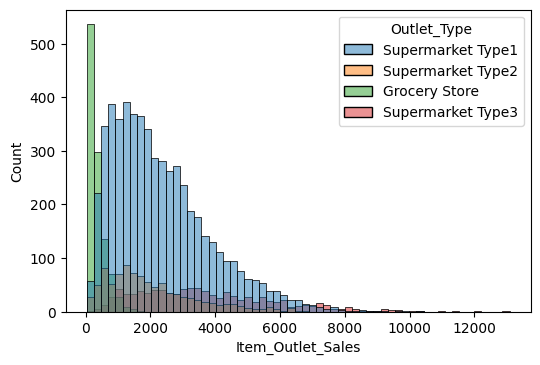

In [7]:
plt.figure(dpi=100)
sns.histplot(data = df, x='Item_Outlet_Sales', color = 'orange', hue ='Outlet_Type')
#sns.histplot(data = df, x='Percentage of Dog Owners', color = 'blue')

#plt.show()

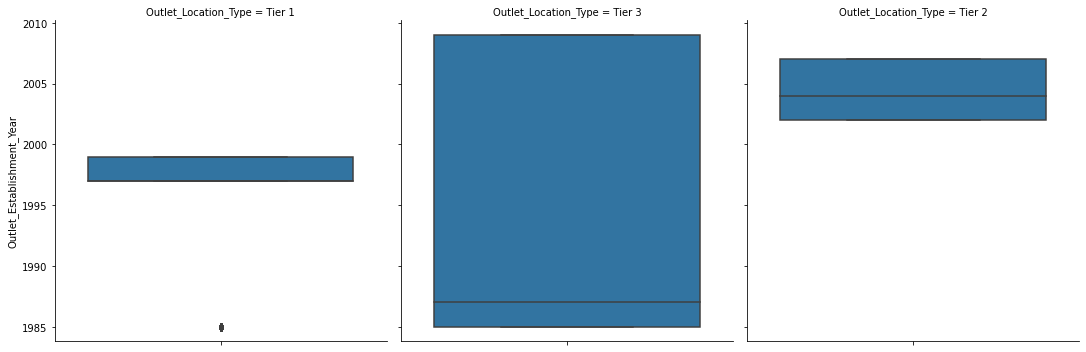

In [9]:
sns.catplot(data = df,
        y = "Outlet_Establishment_Year",
           col = "Outlet_Location_Type",
            col_wrap = 4,
           kind = "box")

In [10]:
corr = df.corr()

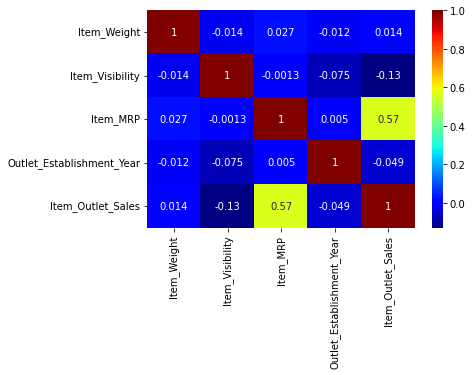

In [13]:
sns.heatmap(corr, cmap = 'jet', annot = True)